In [17]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct
import datetime as dt
import numpy as np


# Reflect Tables into SQLAlchemy ORM

In [19]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [21]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [22]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [51]:
#making sure call structured correctly and returning expected values
session.query(func.count(station.station)).all()

stat= session.query(measurement.station, measurement.prcp).order_by(measurement.station).all()
#stat_count = session.query(func.count(distinct(measurement.station))
stat_df = pd.DataFrame(stat)
stat1 = (stat_df['station']).unique()
stat_count = (stat_df['station']).value_counts()                         
# stat1
stat_count

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

2017-08-14
['2016-08-25' '2016-08-26' '2016-08-27' '2016-08-28' '2016-08-29'
 '2016-08-30' '2016-08-31' '2016-09-01' '2016-09-02' '2016-09-03'
 '2016-09-04' '2016-09-05' '2016-09-06' '2016-09-07' '2016-09-08'
 '2016-09-09' '2016-09-10' '2016-09-11' '2016-09-12' '2016-09-13'
 '2016-09-14' '2016-09-15' '2016-09-16' '2016-09-17' '2016-09-18'
 '2016-09-19' '2016-09-20' '2016-09-21' '2016-09-22' '2016-09-23'
 '2016-09-24' '2016-09-25' '2016-09-26' '2016-09-27' '2016-09-28'
 '2016-09-29' '2016-09-30' '2016-10-01' '2016-10-02' '2016-10-03'
 '2016-10-04' '2016-10-05' '2016-10-06' '2016-10-07' '2016-10-08'
 '2016-10-09' '2016-10-10' '2016-10-11' '2016-10-12' '2016-10-13'
 '2016-10-14' '2016-10-15' '2016-10-16' '2016-10-17' '2016-10-18'
 '2016-10-19' '2016-10-20' '2016-10-21' '2016-10-22' '2016-10-23'
 '2016-10-24' '2016-10-25' '2016-10-26' '2016-10-27' '2016-10-28'
 '2016-10-29' '2016-10-30' '2016-10-31' '2016-11-01' '2016-11-02'
 '2016-11-03' '2016-11-04' '2016-11-05' '2016-11-06' '2016-11-07'

<IPython.core.display.Javascript object>


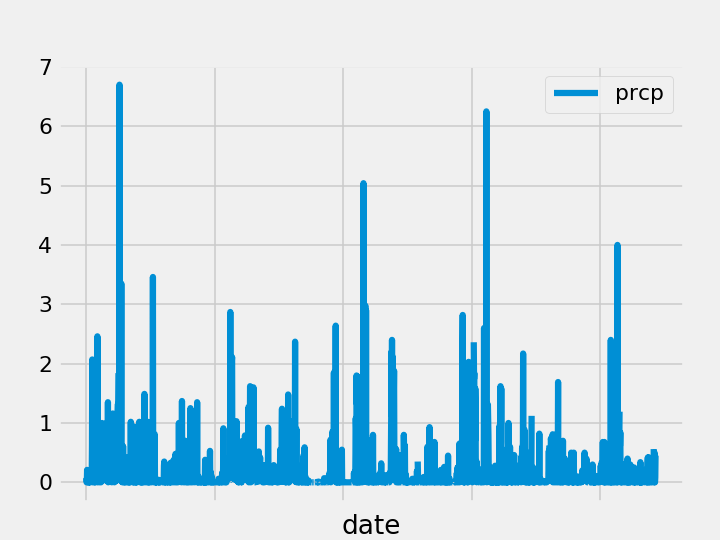

,prcp
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [75]:
#date = dt.datetime(2016, 7, 25)
#d_results = session.query(measurement.date > date).order_by(measurement.date.desc()).all()
last_year = dt.date.today() - dt.timedelta(days = 365)
print(last_year)

past_year = session.query(measurement.date, measurement.prcp).filter(measurement.date > '2016-08-24').\
order_by(measurement.date.asc()).all()

df = pd.DataFrame(past_year)
x_ticks = df['date'].unique()
print(x_ticks)
df = df.set_index('date')
print(df.head())
df_chart = df.plot(kind='line')
plt.show()
df.describe()

In [56]:

busy_station = 'USC00519281'
session.query(m.date, m.prcp, m.station, m.tobs).filter(m.date > '2016-08-24').\
filter(m.station == busy_station).all()

[('2016-08-25', 0.06, 'USC00519281', 80.0),
 ('2016-08-26', 0.01, 'USC00519281', 80.0),
 ('2016-08-27', 0.12, 'USC00519281', 75.0),
 ('2016-08-28', 0.6, 'USC00519281', 73.0),
 ('2016-08-29', 0.35, 'USC00519281', 78.0),
 ('2016-08-30', 0.0, 'USC00519281', 77.0),
 ('2016-08-31', 0.24, 'USC00519281', 78.0),
 ('2016-09-01', 0.02, 'USC00519281', 80.0),
 ('2016-09-02', 0.01, 'USC00519281', 80.0),
 ('2016-09-03', 0.12, 'USC00519281', 78.0),
 ('2016-09-04', 0.14, 'USC00519281', 78.0),
 ('2016-09-05', 0.03, 'USC00519281', 78.0),
 ('2016-09-06', 0.11, 'USC00519281', 73.0),
 ('2016-09-07', 0.16, 'USC00519281', 74.0),
 ('2016-09-08', 0.07, 'USC00519281', 80.0),
 ('2016-09-09', 0.16, 'USC00519281', 79.0),
 ('2016-09-10', 0.09, 'USC00519281', 77.0),
 ('2016-09-11', 0.3, 'USC00519281', 80.0),
 ('2016-09-12', 0.31, 'USC00519281', 76.0),
 ('2016-09-13', 0.34, 'USC00519281', 79.0),
 ('2016-09-14', 2.33, 'USC00519281', 75.0),
 ('2016-09-15', 0.83, 'USC00519281', 79.0),
 ('2016-09-16', 0.06, 'USC00519281'

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [ ]:
# How many stations are available in this dataset?


In [61]:
# What are the most active stations?
# List the stations and the counts in descending order.
m = Base.classes.measurement
s = Base.classes.station

stat = session.query(m.station, m.prcp).\
       order_by(m.station).all()

stat_df = pd.DataFrame(stat)
stat_count = (stat_df['station']).value_counts()                         
stat_count

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [65]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
busy_station = 'USC00519281'
session.query(m.date, m.prcp, m.station, m.tobs).\
filter(m.date > '2016-08-24').\
filter(m.station == busy_station).all()
sel = [m.station,
      func.min(m.tobs),
      func.max(m.tobs),
      func.avg(m.tobs)]
test = session.query(*sel).filter(m.date > '2016-08-24').\
filter(m.station == busy_station).all()
test

[('USC00519281', 59.0, 83.0, 73.08571428571429)]

<IPython.core.display.Javascript object>


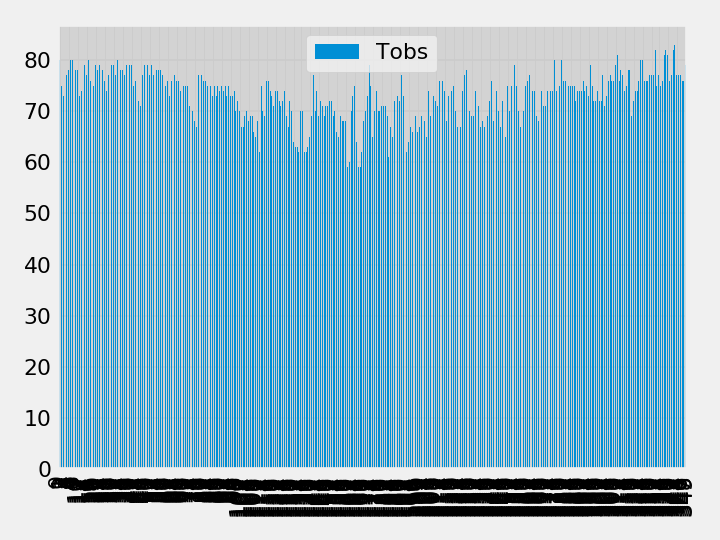

In [82]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
b_station = session.query(m.date, m.tobs).filter(m.date > '2016-08-24').\
filter(m.station == busy_station).all()
b_station
df_stat = pd.DataFrame(b_station, columns=['Date','Tobs'])
df_stat.plot.bar()
plt.tight_layout()
plt.show()

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
